In [1]:
import pandas as pd

In [2]:
import os
os.getcwd()

'/home/wolfgang/git/kaggle/g_research_crypto_forecasting/notebooks'

In [3]:
pd.options.display.max_columns=100
df = pd.read_csv("../data/processed/train_folds.csv").sort_values(by=["Asset_ID", "timestamp"])
df

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target,datetime,test_fold,test_time_window
5480441,1514764860,0,5.0,8.530000,8.530000,8.530000,8.530000,7.838000e+01,8.530000,-0.014399,2018-01-01 00:01:00,1,-1
6753147,1514764920,0,7.0,8.530000,8.530000,8.514500,8.514500,7.139000e+01,8.520215,-0.015875,2018-01-01 00:02:00,1,-1
3940641,1514764980,0,45.0,8.506500,8.529900,8.484800,8.484800,1.546820e+03,8.501394,-0.015410,2018-01-01 00:03:00,0,-1
1506182,1514765040,0,14.0,8.500900,8.506600,8.474400,8.500900,1.258000e+02,8.479810,-0.012524,2018-01-01 00:04:00,0,-1
6290525,1514765100,0,5.0,8.500700,8.500700,8.456000,8.456000,1.250100e+02,8.458435,-0.005940,2018-01-01 00:05:00,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2746317,1623542100,13,190.0,0.068069,0.068154,0.068050,0.068111,1.822400e+06,0.068112,-0.002471,2021-06-12 23:55:00,0,0
1632592,1623542160,13,97.0,0.068137,0.068170,0.068025,0.068088,1.101536e+06,0.068130,-0.001289,2021-06-12 23:56:00,0,0
19359218,1623542220,13,227.0,0.068011,0.068044,0.067909,0.067967,2.378181e+06,0.067978,-0.003800,2021-06-12 23:57:00,4,0
17214757,1623542280,13,103.0,0.067998,0.068083,0.067950,0.068057,1.382896e+06,0.068037,-0.002785,2021-06-12 23:58:00,3,0


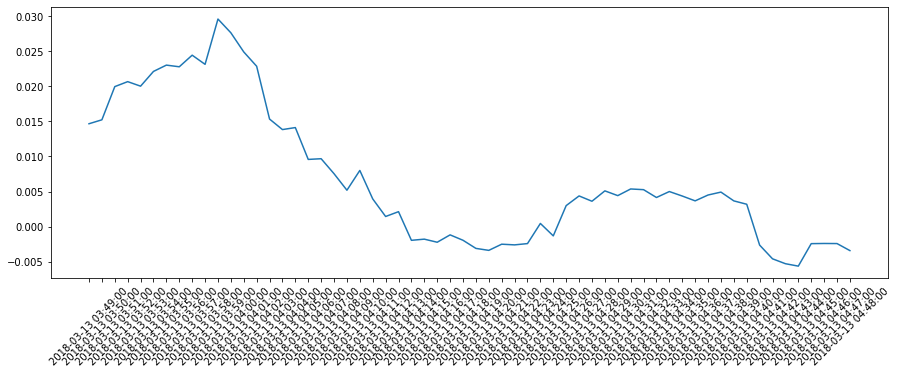

In [6]:
import matplotlib.pyplot as plt

plot_df = df.loc[df["Asset_ID"] == 0,:][100000:100060]

fig, ax = plt.subplots(1, 1, figsize=(15, 5))

ax.tick_params(axis='x', rotation=45)

plt.plot(plot_df.datetime, plot_df.Target)

In [35]:
from scipy.stats import pearsonr

,timestamp,Target
5480441,1514764860,-0.014399
6753147,1514764920,-0.015875
3940641,1514764980,-0.015410
1506182,1514765040,-0.012524
6290525,1514765100,-0.005940
1255535,1514765160,-0.005455
17962267,1514765220,-0.000644
205397,1514765280,-0.003580
14230788,1514765340,-0.005421
7621726,1514765400,-0.005123


In [98]:
pd.options.display.max_rows = 200

join_minutes = 17
field = "Target"
for asset_id in df.Asset_ID.unique():

    targets = df.loc[df["Asset_ID"] == asset_id,["timestamp", field]]

    targets[f"timestamp_minus_{join_minutes}_min_join"] = targets["timestamp"] - join_minutes * 60

    targets = targets.join(
        targets.set_index("timestamp")[[field]], on=f"timestamp_minus_{join_minutes}_min_join", how="left", rsuffix=f"_minus_{join_minutes}_minutes"
    )

    targets = targets.dropna(how="any")

    print(f"""
        Correlation of {field} current and {join_minutes} minutes before on assset_id {asset_id}:
              {pearsonr(targets[f"{field}_minus_{join_minutes}_minutes"], -targets[field])[0]}
    """)


        Correlation of Target current and 17 minutes before on assset_id 0:
              0.015004085063834407
    

        Correlation of Target current and 17 minutes before on assset_id 1:
              0.002542621193361033
    

        Correlation of Target current and 17 minutes before on assset_id 2:
              0.032650347964415995
    

        Correlation of Target current and 17 minutes before on assset_id 3:
              0.02415602767390912
    

        Correlation of Target current and 17 minutes before on assset_id 4:
              0.0028269373840457204
    

        Correlation of Target current and 17 minutes before on assset_id 5:
              0.02274767099233037
    

        Correlation of Target current and 17 minutes before on assset_id 6:
              0.035353027152854974
    

        Correlation of Target current and 17 minutes before on assset_id 7:
              0.021438275673667143
    

        Correlation of Target current and 17 minutes before on a